In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Path = dict({
    'ptbdb_normal': '../data/raw/ptbdb_normal.csv',
    'ptbdb_abnormal': '../data/raw/ptbdb_abnormal.csv',
    'mitbih_test': '../data/raw/mitbih_test.csv',
    'mitbih_train': '../data/raw/mitbih_train.csv',
})



In [8]:

def addColumnsToDataframe(df):
    """
    As the dataset is composed with 188 columns with the 188th columns as the category values, 
    so we give the last column the name 'target', others named with 'c_182'
    """
    num_columns= df.shape[1]
    feature_col_name = ['c_' + str(i) for i in range(0, num_columns - 1)]
    df_columns = feature_col_name + ['target']
    df.columns = df_columns
    return df

def convertColumnAsInt(df, column):
    """
    As the category value is in float type. We want to get the int to identify the category.
    """
    df[column] = df[column].astype(int)
    return df

def getBarChartFromCategoryValueCounts(category_value_counts):
    """
    We call the plot over the pandas series object to plot the category count values 
    """
    plt.figure(figsize=(10, 6))
    bar_chart = category_value_counts.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(False)
    plt.xticks(rotation=360)
    for i in bar_chart.containers:
        bar_chart.bar_label(i, label_type='edge')
    plt.show()


def showTop10DataInChart(df):
    plt.figure(figsize=(10, 6))
    xDataAxis = list(range(0, df.shape[1]))
    yDataRows = list(df.values[1: 10])
    for y in yDataRows: 
        plt.plot(xDataAxis, y)
    plt.show()

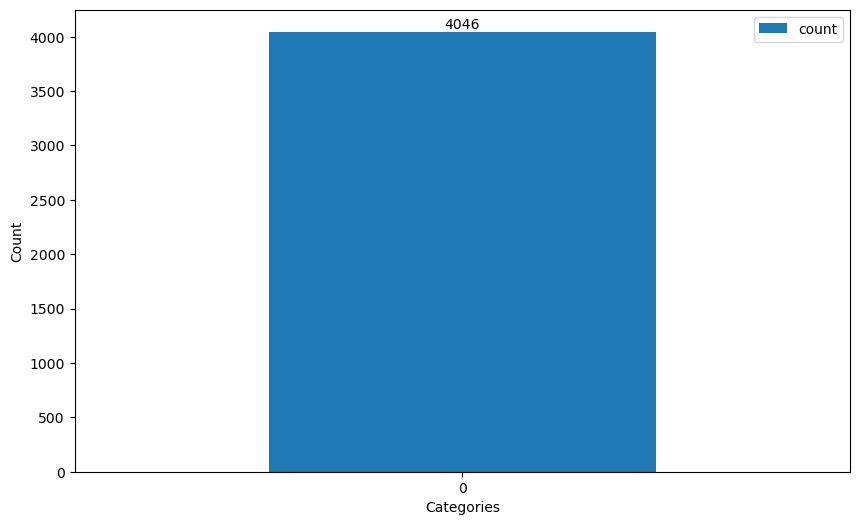

In [9]:

ptbdb_normal = pd.read_csv(Path.get('ptbdb_normal'), header=None )
ptbdb_normal_with_columns = addColumnsToDataframe(ptbdb_normal)

# convert target varaible from float to string
ptbdb_normal_with_columns = convertColumnAsInt(ptbdb_normal_with_columns, 'target')

# get the category value counts. 
ptbdb_normal_category_counts = ptbdb_normal_with_columns['target'].value_counts()

getBarChartFromCategoryValueCounts(ptbdb_normal_category_counts)

Check the meanings of the Data Rows(first 10 rows as example):

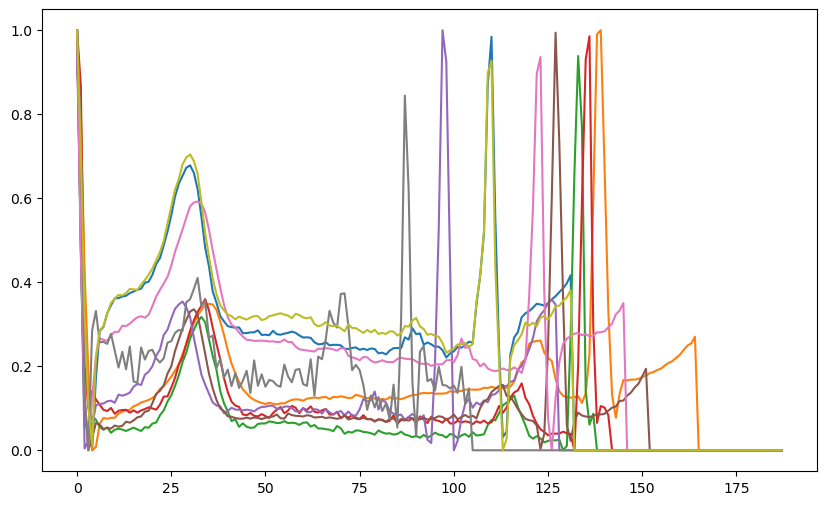

In [10]:
showTop10DataInChart(ptbdb_normal_with_columns)

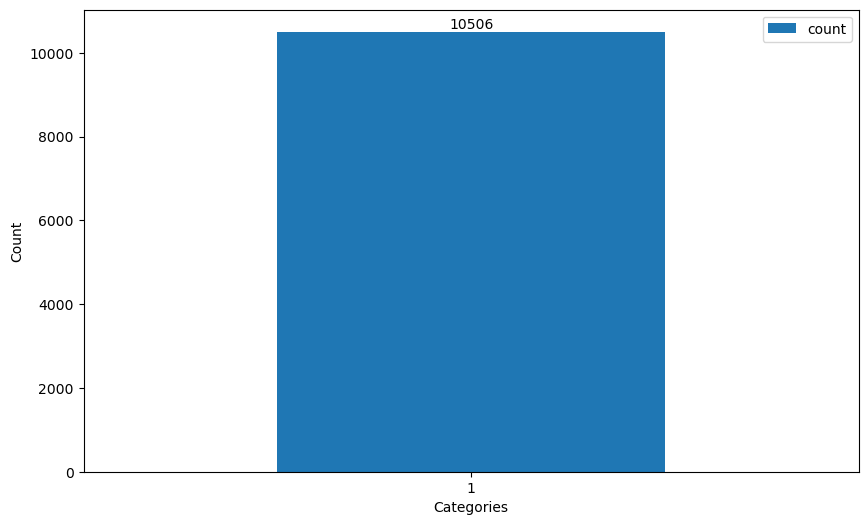

In [11]:
ptbdb_abnormal = pd.read_csv(Path.get('ptbdb_abnormal'), header=None )
ptbdb_abnormal_with_columns = addColumnsToDataframe(ptbdb_abnormal)
ptbdb_abnormal_with_columns = convertColumnAsInt(ptbdb_abnormal, 'target')
ptbdb_abnormal_category_count = ptbdb_abnormal_with_columns['target'].value_counts()
getBarChartFromCategoryValueCounts(ptbdb_abnormal_category_count)

Check the sample of abnormal heartbeat signal(first 10 sample as):

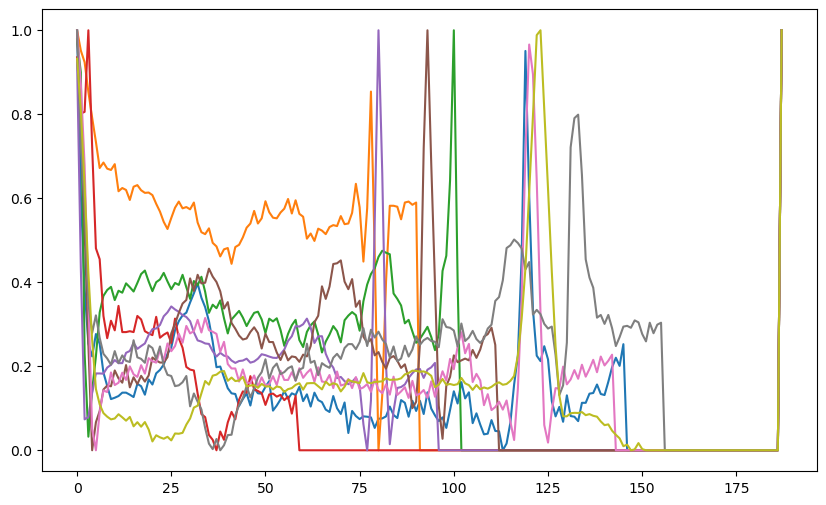

In [12]:
showTop10DataInChart(ptbdb_abnormal_with_columns)

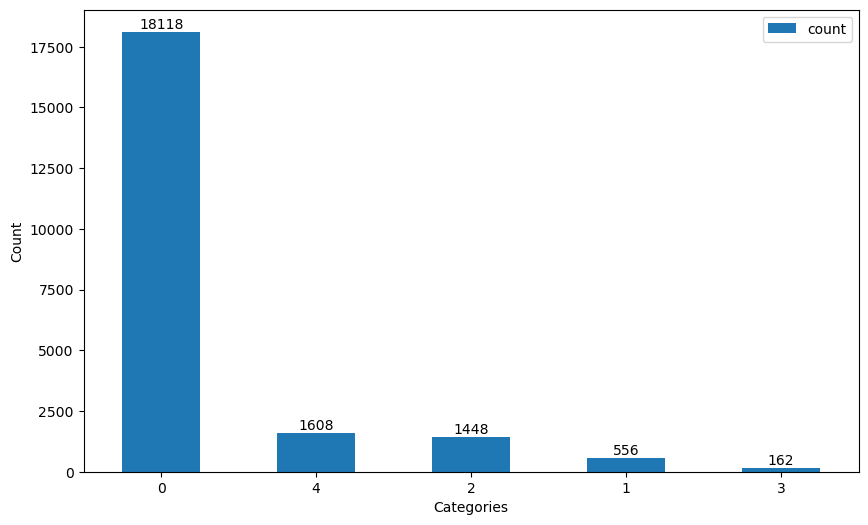

In [13]:
mitbih_train = pd.read_csv(Path.get('mitbih_test'), header=None )
mitbih_train_with_columns = addColumnsToDataframe(mitbih_train)
mitbih_train_with_columns = convertColumnAsInt(mitbih_train_with_columns, 'target')
getBarChartFromCategoryValueCounts(mitbih_train_with_columns['target'].value_counts())

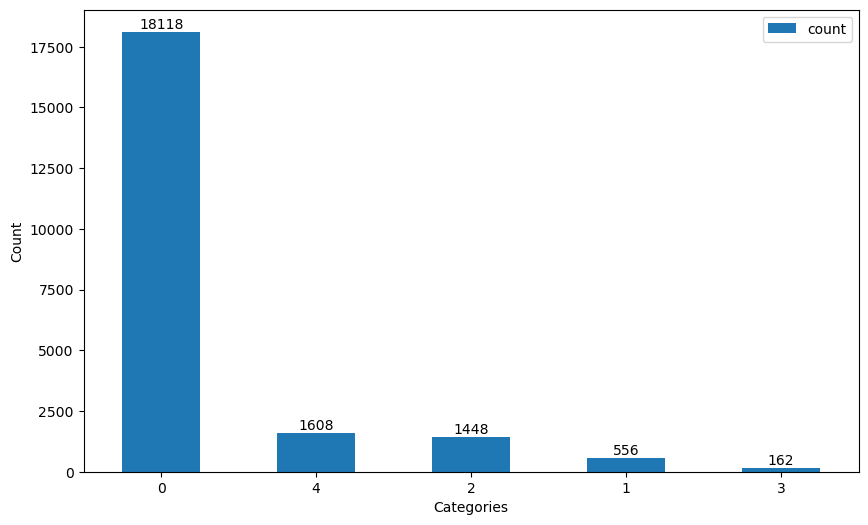

In [14]:
mitbih_test = pd.read_csv(Path.get('mitbih_test'), header=None )
mitbih_test_with_columns = addColumnsToDataframe(mitbih_test)
mitbih_test_with_columns = convertColumnAsInt(mitbih_test_with_columns, 'target')
getBarChartFromCategoryValueCounts(mitbih_test_with_columns['target'].value_counts())